In [157]:
#importing libraries
import glob
import numpy as np
import pandas as pd
import pathlib 
import cv2
import matplotlib.pyplot as plt
import fnmatch
import os

In [158]:
imagePatches = glob.glob('./dataset/**/*.png', recursive=True)

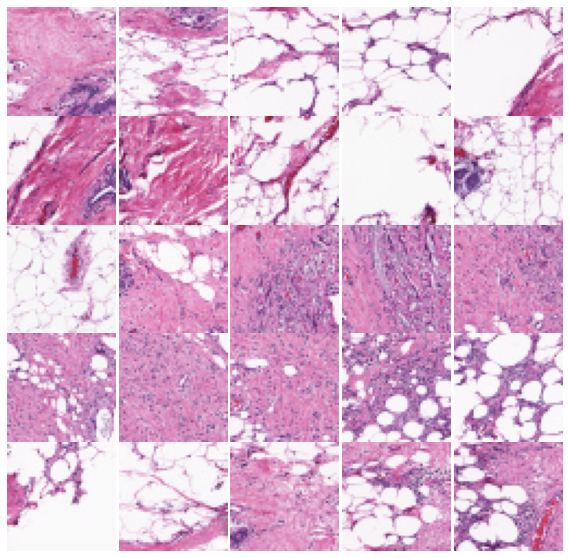

In [159]:
# Plot Multiple Images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [160]:
patternZero = '*class0.png'
patternOne = '*class1.png'
IDC_negative= fnmatch.filter(imagePatches, patternZero)
IDC_positive= fnmatch.filter(imagePatches, patternOne)

In [161]:
all_images = []
all_images.extend(IDC_positive)
all_images.extend(IDC_negative)

In [162]:
import random
random.shuffle(all_images) #shuffling the images

In [163]:
from tqdm import tqdm 
import seaborn

In [164]:
#append labels and data
data=[]
labels = []
classes = []
for i in tqdm(range(0,90000)):
    image= cv2.imread(all_images[i])  #reading the image
    image = cv2.resize(image, (50,50), interpolation=cv2.INTER_CUBIC)
    image=np.array(image)  #converting into numpy array
    image = image.astype('float32')
    image /= 255  #scaling image
    data.append(image)
    cls = all_images[i].split('\\')[2]
    if cls=='0':
        lbl=0
    else:
        lbl=1
    labels.append(lbl)
    classes.append(cls)

100%|██████████████████████████████████████████████████████████████████████████| 90000/90000 [00:24<00:00, 3616.26it/s]


In [165]:
data = np.array(data)

In [166]:
labels = np.array(labels)

In [167]:
print(data.shape,labels.shape)

(90000, 50, 50, 3) (90000,)


In [168]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
import tensorflow as tf

In [169]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2)

In [60]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [61]:
x_train.shape

(57600, 50, 50, 3)

In [62]:
y_train.shape

(57600,)

In [63]:
x_val.shape

(14400, 50, 50, 3)

In [64]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [65]:
y_val= to_categorical(y_val, num_classes = 2)

In [66]:
y_val.shape

(14400, 2)

In [67]:
X_trainShape = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
X_testShape = x_test.shape[1]*x_test.shape[2]*x_test.shape[3]
X_trainFlat = x_train.reshape(x_train.shape[0], X_trainShape)
X_testFlat = x_test.reshape(x_test.shape[0], X_testShape)

In [68]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [69]:
#apllying undersampling for data balancing
ros = RandomUnderSampler(sampling_strategy='auto')
X_trainRos, Y_trainRos = ros.fit_resample(X_trainFlat, y_train)
X_testRos, Y_testRos = ros.fit_resample(X_testFlat, y_test)

C:\Users\Intel\Anaconda\envs\gpu2\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Intel\Anaconda\envs\gpu2\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [70]:
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
Y_testRosHot = to_categorical(Y_testRos, num_classes = 2)

In [71]:
for i in range(len(X_trainRos)):
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),50,50,3)

In [72]:
for i in range(len(X_trainRos)):
    X_testRosReshaped = X_testRos.reshape(len(X_testRos),50,50,3)

In [73]:
print(X_trainRosReshaped.shape)
print(X_testRosReshaped.shape)
print(Y_trainRosHot.shape)
print(Y_testRosHot.shape)


(33122, 50, 50, 3)
(10168, 50, 50, 3)
(33122, 2)
(10168, 2)


In [74]:
type(Y_trainRos)

numpy.ndarray

In [75]:
Y_trainRos.reshape(1,-1)

array([[0, 0, 0, ..., 1, 1, 1]])

In [76]:
Y_trainRos.shape

(33122, 1)

In [77]:
df = pd.DataFrame(Y_trainRos,columns=["Labels"])

In [78]:
labels = df['Labels']

In [79]:
a=labels.value_counts()

C:\Users\Intel\Anaconda\envs\gpu2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Labels', ylabel='count'>

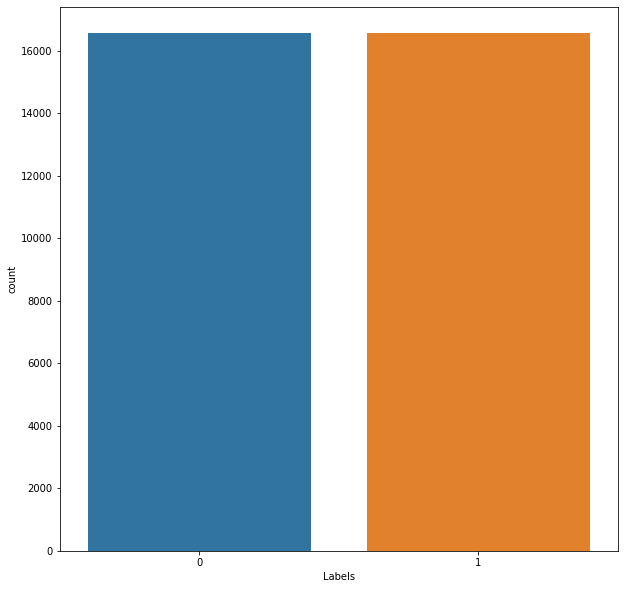

In [80]:
seaborn.countplot(labels)

In [122]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers

In [123]:
#building model
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(50,50,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [124]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [125]:
#compile
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [126]:
history = model.fit(X_trainRosReshaped, Y_trainRosHot,validation_data=(x_val,y_val),epochs=40)

Epoch 1/40
1036/1036 [==============================] - 82s 71ms/step - loss: 0.5504 - accuracy: 0.7294 - val_loss: 0.4074 - val_accuracy: 0.8277
Epoch 2/40
1036/1036 [==============================] - 70s 68ms/step - loss: 0.4407 - accuracy: 0.8019 - val_loss: 0.4530 - val_accuracy: 0.7967
Epoch 3/40
1036/1036 [==============================] - 68s 66ms/step - loss: 0.4306 - accuracy: 0.8051 - val_loss: 0.4348 - val_accuracy: 0.8067
Epoch 4/40
1036/1036 [==============================] - 69s 67ms/step - loss: 0.4158 - accuracy: 0.8162 - val_loss: 0.4116 - val_accuracy: 0.8188
Epoch 5/40
1036/1036 [==============================] - 70s 68ms/step - loss: 0.4080 - accuracy: 0.8179 - val_loss: 0.4576 - val_accuracy: 0.7915
Epoch 6/40
1036/1036 [==============================] - 69s 67ms/step - loss: 0.3984 - accuracy: 0.8250 - val_loss: 0.4200 - val_accuracy: 0.8147
Epoch 7/40
1036/1036 [==============================] - 70s 68ms/step - loss: 0.3935 - accuracy: 0.8296 - val_loss: 0.4103 -

In [127]:
model.save('./mymodel.h5')

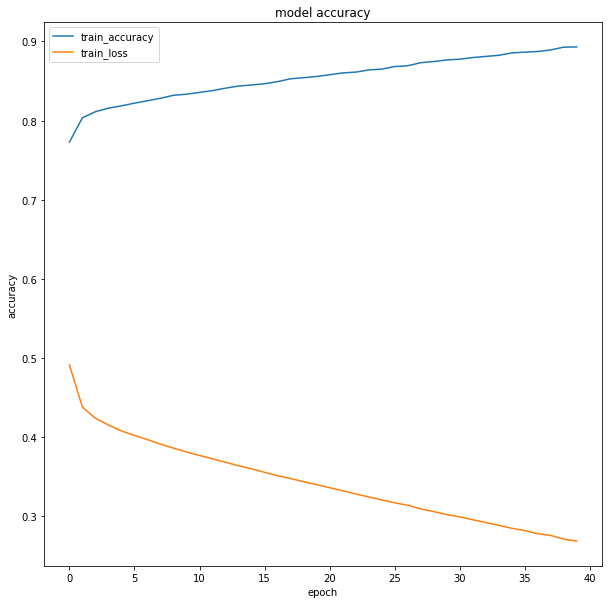

In [128]:
#plotting accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'train_loss'], loc='upper left')
plt.show()

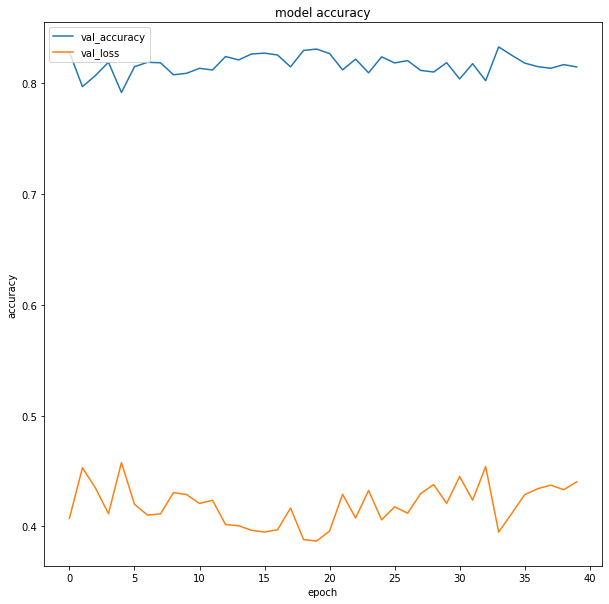

In [129]:
#plotting loss graph
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val_accuracy', 'val_loss'], loc='upper left')
plt.show()

In [133]:
y_pred = model.predict(x_test)

In [131]:
#converting labels from probability to assurity
y_pred1=np.argmax(y_pred,axis=1)
y_test1=np.argmax(y_test,axis=1)

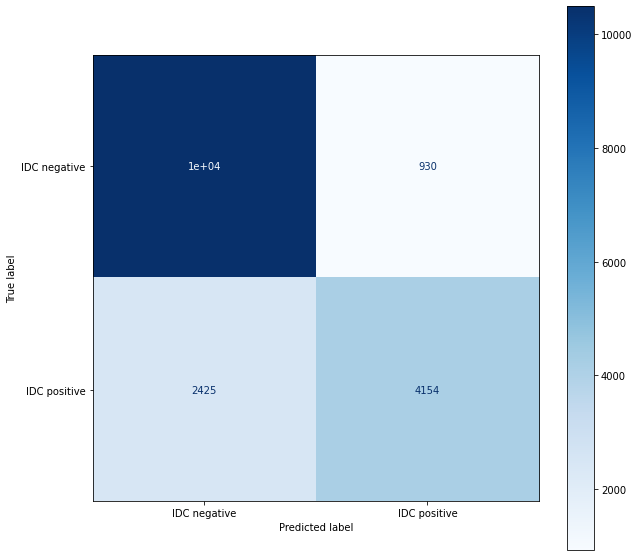

In [134]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report
labels=['IDC negative', 'IDC positive']
cm = confusion_matrix(y_pred1,y_test1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [135]:
target_names = ['IDC negative','IDC positive']
print(classification_report(y_pred1,y_test1, target_names=target_names))

              precision    recall  f1-score   support

IDC negative       0.81      0.92      0.86     11421
IDC positive       0.82      0.63      0.71      6579

    accuracy                           0.81     18000
   macro avg       0.81      0.77      0.79     18000
weighted avg       0.81      0.81      0.81     18000



In [137]:
#loading model
from keras.models import load_model
model = tf.keras.models.load_model('./mymodel.h5')

In [147]:
#doing predictions
classes=['IDC negative','IDC positive']
def plot_results(x,y,z,index):
    plt.imshow(x[index],cmap='binary')
    plt.xlabel(y[index])
    plt.ylabel(z[index])

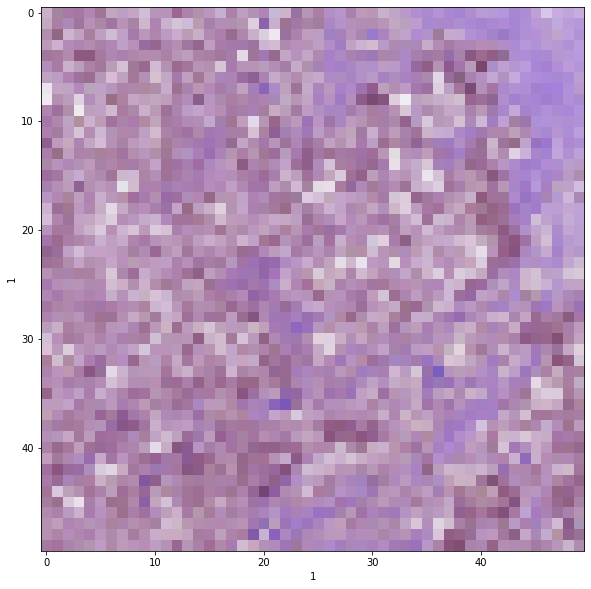

In [148]:
plot_results(x_test,y_pred1,y_test1,39)

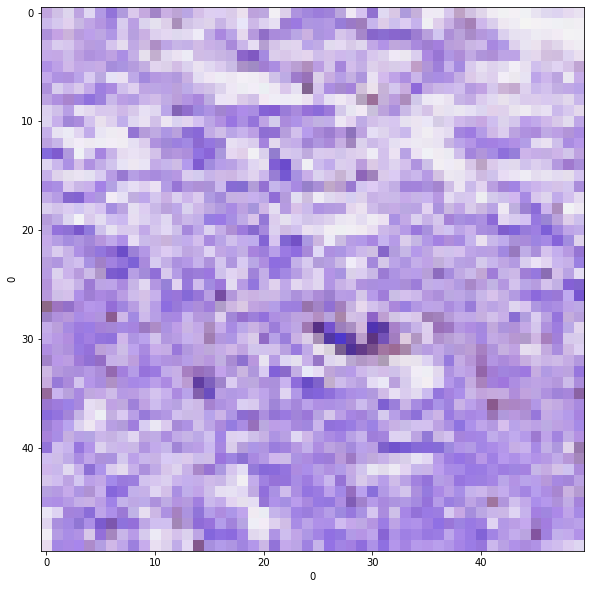

In [149]:
plot_results(x_test,y_pred1,y_test1,50)

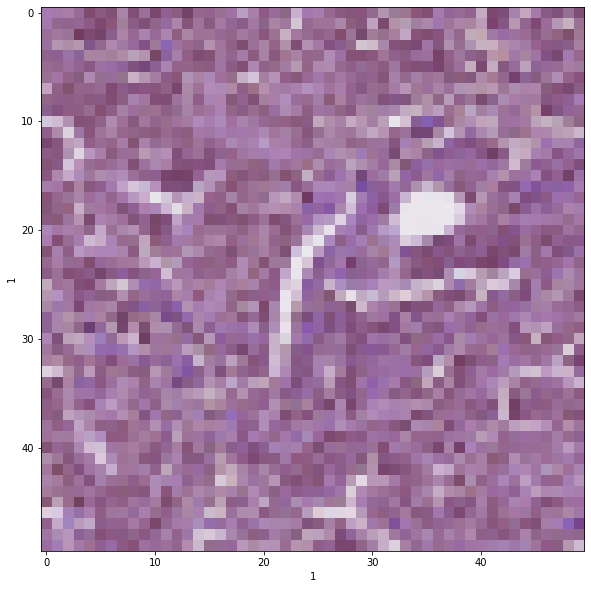

In [150]:
plot_results(x_test,y_pred1,y_test1,75)

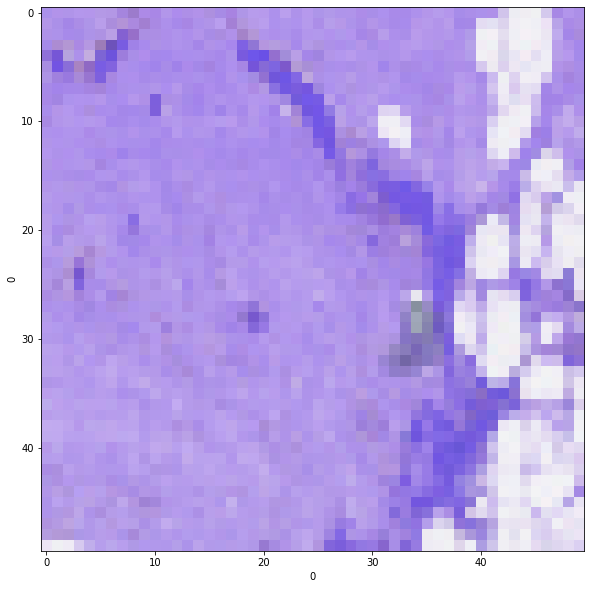

In [151]:
plot_results(x_test,y_pred1,y_test1,222)